In [1]:
!pip install dandi

# Download the entire dataset into the Colab environment
!dandi download DANDI:000008/0.211014.0809 --output-dir /content/dandi_000008

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 370.0/370.0 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.4/340.4 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.2/788.2 kB 31.7 MB/s eta 0:00:00
   ━━━━━━

In [2]:
!mkdir -p /content/dandi_000008
!dandi download DANDI:000008/0.211014.0809 --output-dir /content/dandi_000008

PATH                                                                                                                      SIZE       DONE            DONE% CHECKSUM STATUS          MESSAGE   
000008/dandiset.yaml                                                                                                                                                done            updated   
000008/sub-mouse-AAYYT/sub-mouse-AAYYT_ses-20180420-sample-2_slice-20180420-slice-2_cell-20180420-sample-2_icephys.nwb    9.3 MB     9.3 MB           100%    ok    done                      
000008/sub-mouse-AAYYT/sub-mouse-AAYYT_ses-20180420-sample-3_slice-20180420-slice-3_cell-20180420-sample-3_icephys.nwb    9.3 MB     9.3 MB           100%    ok    done                      
000008/sub-mouse-AAYYT/sub-mouse-AAYYT_ses-20180420-sample-4_slice-20180420-slice-4_cell-20180420-sample-4_icephys.nwb    9.5 MB     9.5 MB           100%    ok    done                      
000008/sub-mouse-AEJGZ/sub-mouse-AEJGZ_ses-20

In [3]:
import os
import h5py

ROOT = "/content/dandi_000008"

# Dictionary: file_path → list_of_sweeps
cell_sweeps = {}

for dirpath, dirnames, filenames in os.walk(ROOT):
    for fn in filenames:
        if fn.endswith(".nwb"):
            fp = os.path.join(dirpath, fn)
            try:
                with h5py.File(fp, "r") as f:
                    acq = f["acquisition"]
                    sweeps = sorted([
                        k for k in acq.keys()
                        if "CurrentClampSeries" in k
                    ])
                    cell_sweeps[fp] = sweeps
            except Exception as e:
                print("Error reading:", fp, e)

# Print summary
print("TOTAL CELLS:", len(cell_sweeps))
for fp, sweeps in list(cell_sweeps.items())[:10]:
    print("\nCell:", fp)
    print("Num sweeps:", len(sweeps))
    print("Sweeps:", sweeps)


TOTAL CELLS: 1328

Cell: /content/dandi_000008/000008/sub-mouse-VTQGY/sub-mouse-VTQGY_ses-20190325-sample-5_slice-20190325-slice-5_cell-20190325-sample-5_icephys.nwb
Num sweeps: 80
Sweeps: ['CurrentClampSeries000', 'CurrentClampSeries001', 'CurrentClampSeries002', 'CurrentClampSeries003', 'CurrentClampSeries004', 'CurrentClampSeries005', 'CurrentClampSeries006', 'CurrentClampSeries007', 'CurrentClampSeries008', 'CurrentClampSeries009', 'CurrentClampSeries010', 'CurrentClampSeries011', 'CurrentClampSeries012', 'CurrentClampSeries013', 'CurrentClampSeries014', 'CurrentClampSeries015', 'CurrentClampSeries016', 'CurrentClampSeries017', 'CurrentClampSeries018', 'CurrentClampSeries019', 'CurrentClampSeries020', 'CurrentClampSeries021', 'CurrentClampSeries022', 'CurrentClampSeries023', 'CurrentClampSeries024', 'CurrentClampSeries025', 'CurrentClampSeries026', 'CurrentClampSeries027', 'CurrentClampSeries028', 'CurrentClampSeries029', 'CurrentClampSeries030', 'CurrentClampSeries031', 'CurrentCl

In [4]:
import os
import h5py
import numpy as np
import pandas as pd

ROOT = "/content/dandi_000008"
SWEEP_IDX = 20
SWEEP_NAME = f"CurrentClampSeries{SWEEP_IDX:03d}"

# ---------- 1) Find all NWB files ----------
nwb_files = []
for dirpath, dirnames, filenames in os.walk(ROOT):
    for fn in filenames:
        if fn.endswith(".nwb"):
            nwb_files.append(os.path.join(dirpath, fn))

print(f"Found {len(nwb_files)} NWB files")

# ---------- 2) Collect traces for this sweep + lengths ----------
traces = []
cell_names = []
lengths = []

for fp in nwb_files:
    try:
        f = h5py.File(fp, "r")
    except Exception as e:
        print("Error opening", fp, ":", e)
        continue

    acq = f.get("acquisition", None)
    if acq is None or SWEEP_NAME not in acq:
        f.close()
        continue

    v = acq[SWEEP_NAME]["data"][:]       # 1D voltage trace
    traces.append(v)
    lengths.append(len(v))

    cell_id = os.path.basename(fp).replace(".nwb", "")
    cell_names.append(f"{cell_id}_sweep{SWEEP_IDX}")

    f.close()

print(f"Cells with sweep {SWEEP_IDX}: {len(traces)}")
if len(traces) == 0:
    raise RuntimeError("No cells had this sweep, check SWEEP_IDX or paths.")

lengths = np.array(lengths)

# ---------- 3) Find the most common length (mode) ----------
# Count how many cells have each length
unique_lengths, counts = np.unique(lengths, return_counts=True)
mode_idx = np.argmax(counts)
L_mode = unique_lengths[mode_idx]
n_mode = counts[mode_idx]

print("All unique lengths and counts:")
for L, c in zip(unique_lengths, counts):
    print(f"  length {L}: {c} cells")
print(f"\nUsing most common length L_mode = {L_mode} (cells = {n_mode})")

# ---------- 4) Keep only cells with length == L_mode ----------
selected_indices = [i for i, L in enumerate(lengths) if L == L_mode]

traces_sel = [traces[i] for i in selected_indices]
names_sel  = [cell_names[i] for i in selected_indices]

print(f"Selected {len(traces_sel)} cells with length {L_mode}")

# Stack into array (N_cells_mode, L_mode)
traces_arr = np.stack(traces_sel, axis=0).astype(np.float32)   # (N_cells_mode, L_mode)

# ---------- 5) Build DataFrame in WST format ----------
# rows = time samples, columns = cells → shape (L_mode, N_cells_mode)
traces_arr_T = traces_arr.T   # (L_mode, N_cells_mode)

t_vec = np.arange(L_mode)
df = pd.DataFrame(traces_arr_T, index=t_vec, columns=names_sel)
df.index.name = "time"

CSV_PATH = "voltage___traces2345.csv"
df.to_csv(CSV_PATH)
print("✅ Saved:", CSV_PATH, "with shape", df.shape)


Found 1328 NWB files
Cells with sweep 20: 1328
All unique lengths and counts:
  length 22500: 538 cells
  length 25000: 790 cells

Using most common length L_mode = 25000 (cells = 790)
Selected 790 cells with length 25000
✅ Saved: voltage___traces2345.csv with shape (25000, 790)


In [5]:
!pip install kymatio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 kB 371.9 kB/s eta 0:00:00


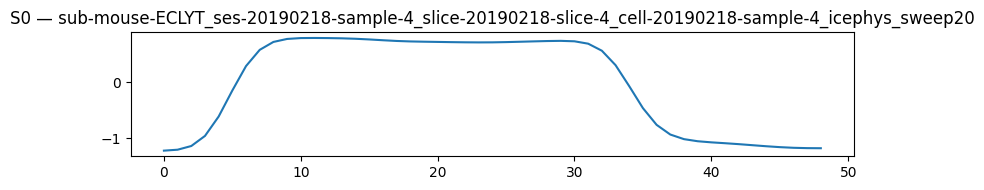

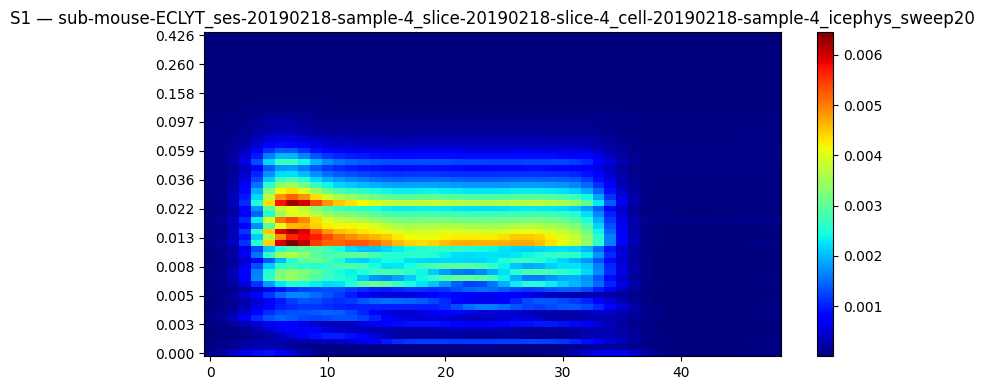

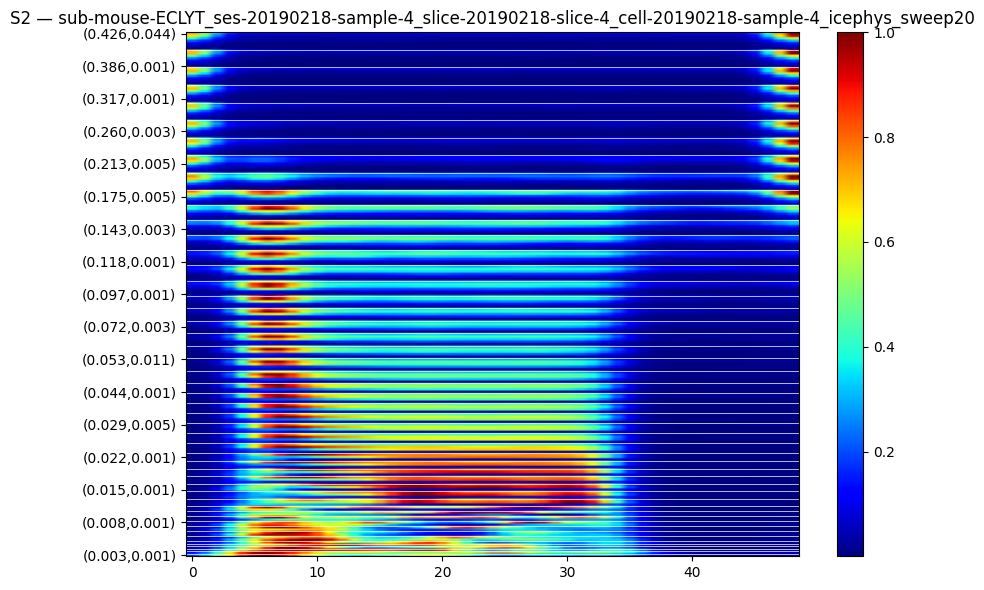

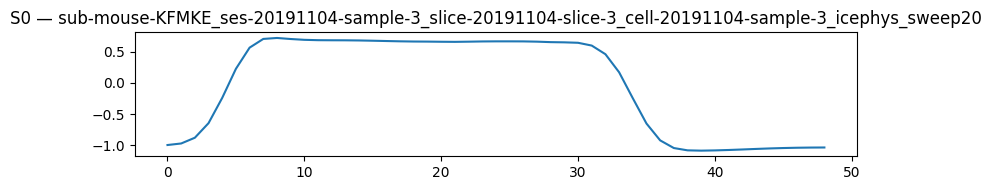

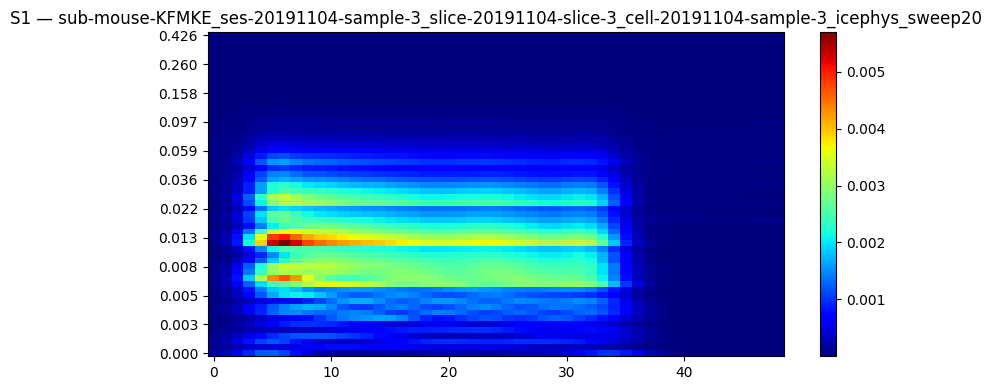

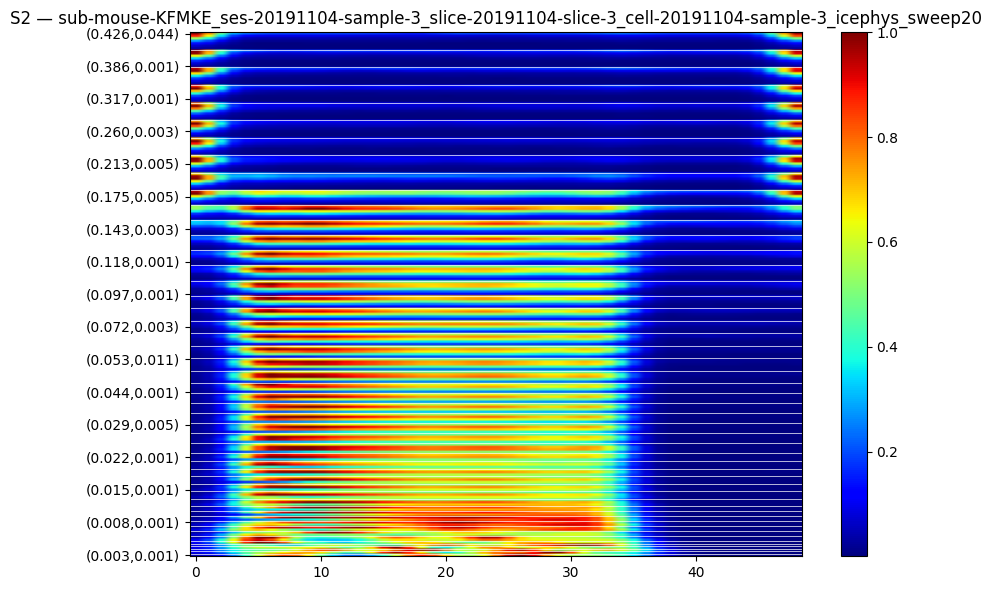

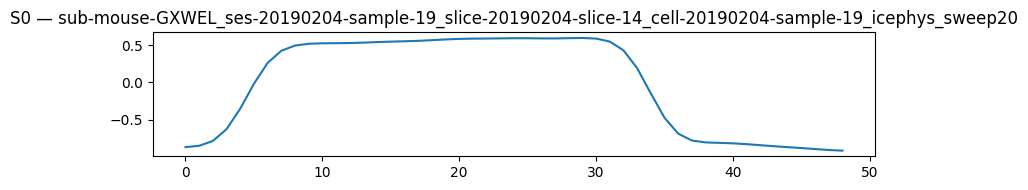

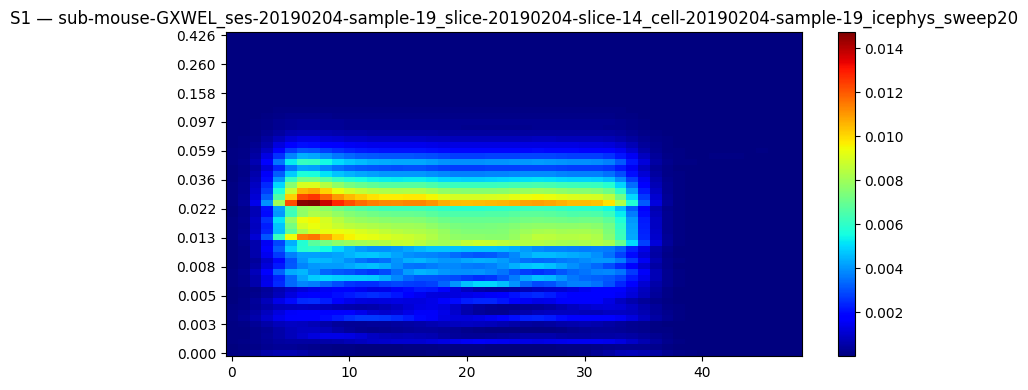

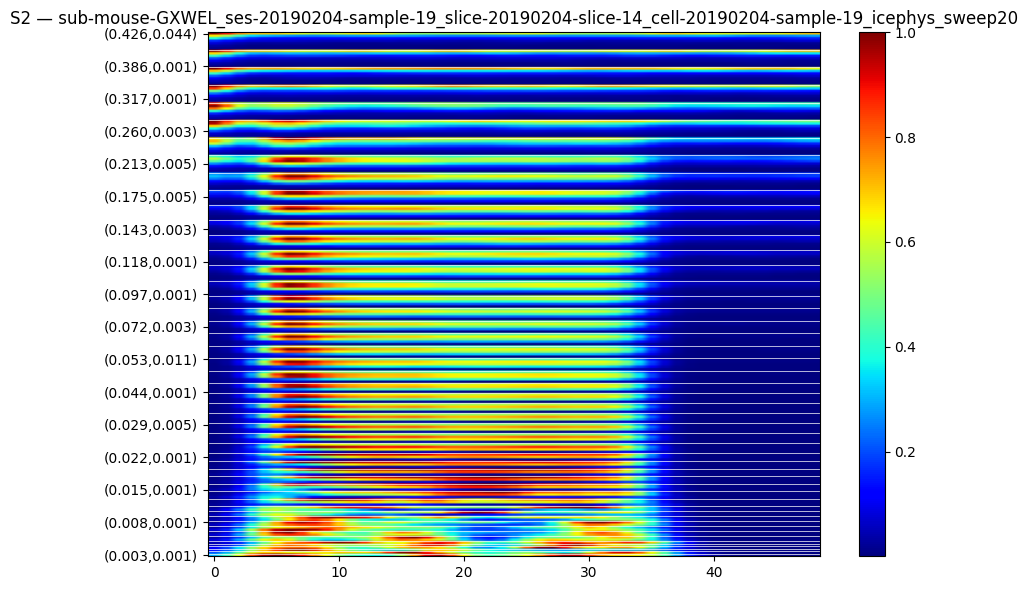

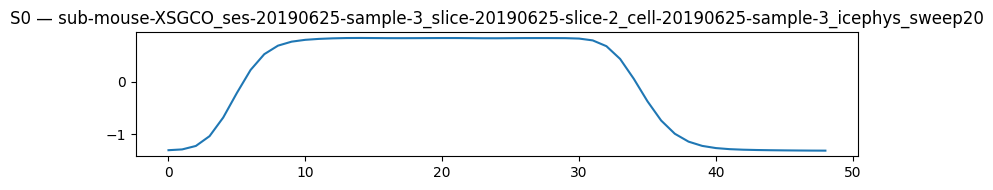

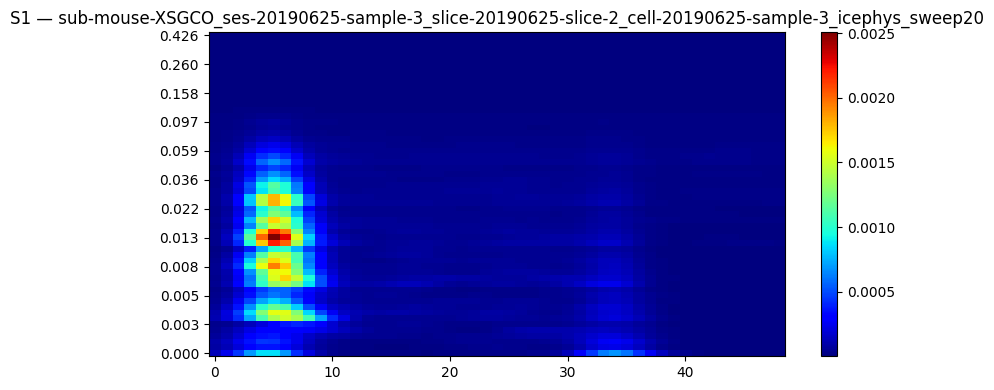

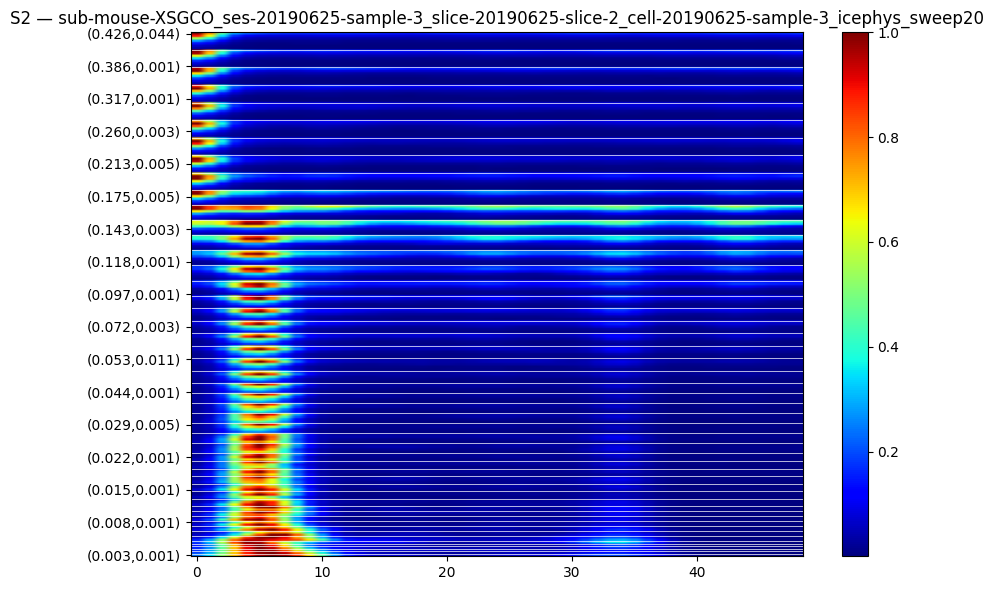

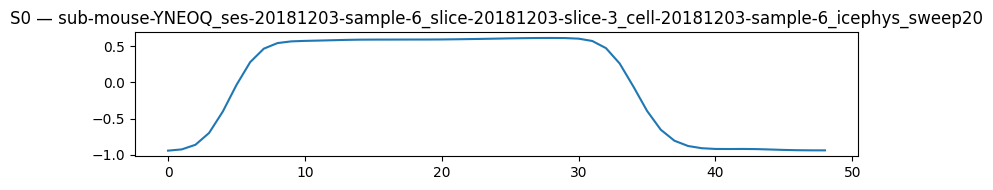

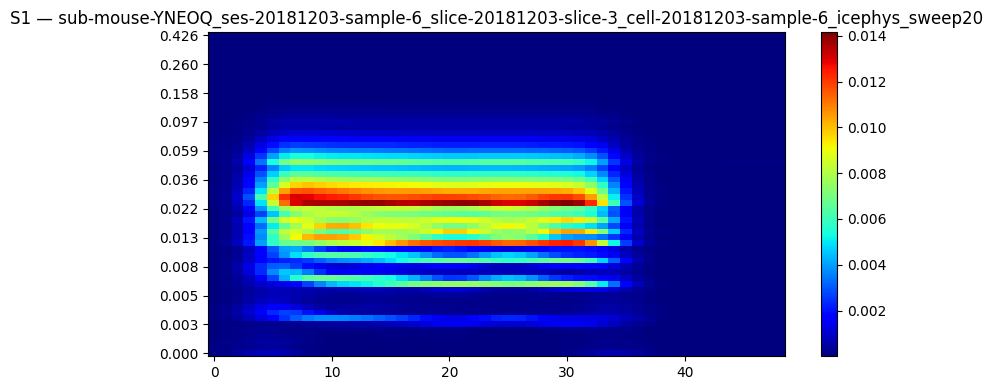

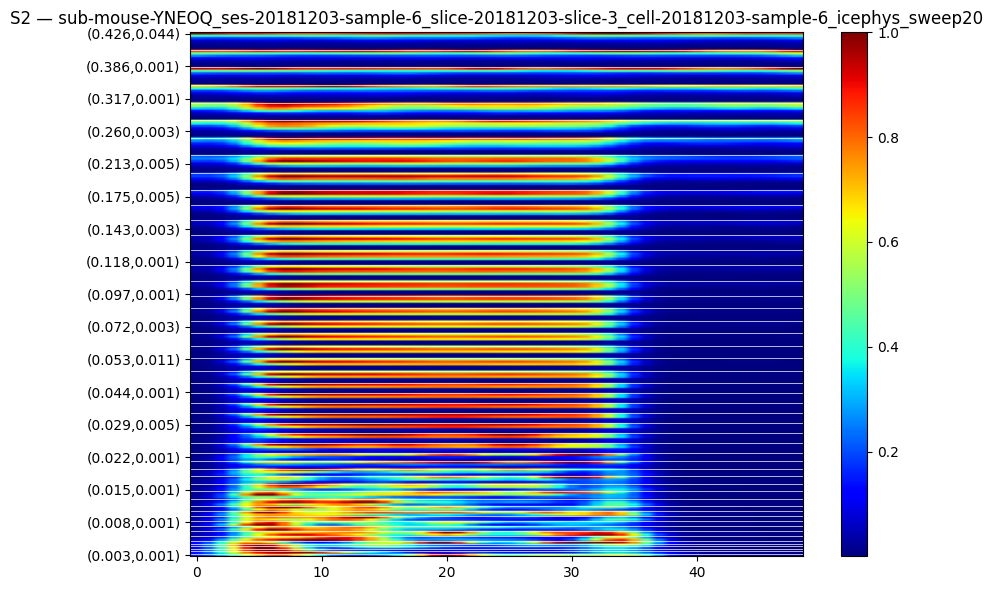

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from kymatio.torch import Scattering1D
import random

CSV_PATH = "voltage___traces2345.csv"
J = 9
Q = 7
OVERSAMPLING = 0
MAX_ORDER = 2
N_PLOTS = 5

df = pd.read_csv(CSV_PATH)
names = df.columns[1:]
data = df[names].T.to_numpy().astype(np.float32)

N, L = data.shape
means = data.mean(axis=1, keepdims=True)
stds = data.std(axis=1, keepdims=True)
stds[stds == 0] = 1
data = (data - means) / stds

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

scattering = Scattering1D(J=J, shape=L, Q=Q, oversampling=OVERSAMPLING, max_order=MAX_ORDER).to(device)
meta = scattering.meta()

order = meta["order"]
j_all = meta["j"]
xi_all = meta["xi"]

order0 = np.where(order == 0)[0]
order1 = np.where(order == 1)[0]
order2 = np.where(order == 2)[0]

xi1 = xi_all[order1, 0]
sort1 = np.argsort(xi1)[::-1]
xi1_sorted = xi1[sort1]

xi_pairs = xi_all[order2]
perm_S2 = np.lexsort((-xi_pairs[:, 1], -xi_pairs[:, 0]))
order2_sorted = order2[perm_S2]
xi_pairs_sorted = xi_pairs[perm_S2]

parent_change_rows = np.where(np.diff(xi_pairs_sorted[:, 0]) != 0)[0] + 1

x_torch = torch.from_numpy(data).unsqueeze(1).float().to(device)
with torch.no_grad():
    Sx = scattering(x_torch)

Sx = Sx.cpu().numpy()
if Sx.ndim == 4:
    Sx = Sx[:, 0]
if Sx.shape[1] != len(order):
    Sx = np.transpose(Sx, (0, 2, 1))

S0 = Sx[:, order0, :]
S1_unsorted = Sx[:, order1, :]
S2_unsorted = Sx[:, order2, :]

S1 = S1_unsorted[:, sort1, :]
S2 = S2_unsorted[:, perm_S2, :]

np.save("GPU_WST_full.npy", Sx)
np.save("GPU_WST_S1.npy", S1)
np.save("GPU_WST_S2.npy", S2)

np.savez(
    "GPU_WST_S1S2_both.npz",
    names=np.array(names),
    S1=S1,
    S2=S2,
    xi1=xi1_sorted,
    xi_pairs=xi_pairs_sorted
)

rand_indices = random.sample(range(N), min(N_PLOTS, N))

for idx in rand_indices:
    name = names[idx]

    plt.figure(figsize=(8, 2))
    plt.plot(S0[idx, 0])
    plt.title(f"S0 — {name}")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 4))
    plt.imshow(S1[idx], aspect="auto", origin="upper", cmap="jet")
    ax = plt.gca()
    K = len(xi1_sorted)
    step = max(1, K // 10)
    tick_pos = np.arange(0, K, step)
    ax.set_yticks(tick_pos)
    ax.set_yticklabels([f"{xi1_sorted[p]:.3f}" for p in tick_pos])
    plt.title(f"S1 — {name}")
    plt.colorbar()
    plt.tight_layout()
    plt.show()

    S2n = S2[idx].copy()
    start = 0
    for brk in list(parent_change_rows) + [S2n.shape[0]]:
        block = S2n[start:brk]
        d = np.max(block)
        if d > 0:
            S2n[start:brk] = block / d
        start = brk

    plt.figure(figsize=(9, 6))
    plt.imshow(S2n, aspect="auto", origin="upper", cmap="jet")
    ax = plt.gca()
    for r in parent_change_rows:
        ax.axhline(y=r - 0.5, color="white", linewidth=0.5)
    npaths = S2n.shape[0]
    step = max(1, npaths // 15)
    ticks = np.arange(0, npaths, step)
    ax.set_yticks(ticks)
    ax.set_yticklabels([f"({xi_pairs_sorted[r,0]:.3f},{xi_pairs_sorted[r,1]:.3f})" for r in ticks])
    plt.title(f"S2 — {name}")
    plt.colorbar()
    plt.tight_layout()
    plt.show()

Loaded S1: (790, 56, 49)
Flattened S1: (790, 2744)
Standardized feature matrix: (790, 2744)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP embedding: (790, 2)


/tmp/ipython-input-1813570126.py:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


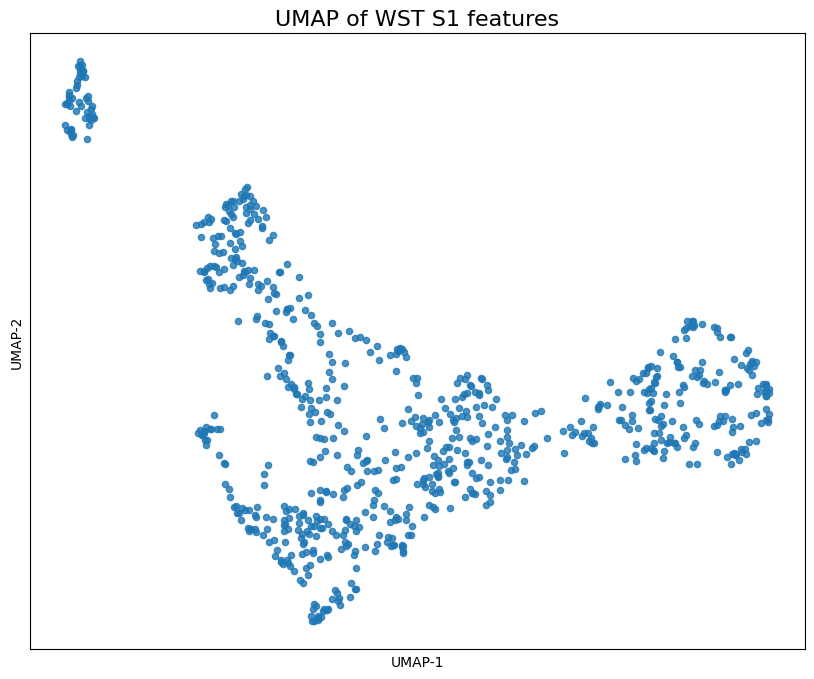

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap

# -------------------------------------------------------
# 1) Load S1 from saved .npz
# -------------------------------------------------------
npz = np.load("/content/GPU_WST_S1S2_both.npz", allow_pickle=True)

S1 = npz["S1"]      # shape (N, n1, T)
names = npz["names"]

print("Loaded S1:", S1.shape)

# -------------------------------------------------------
# 2) Flatten S1 per cell  → shape (N, n1*T)
# -------------------------------------------------------
N, n1, T = S1.shape
S_flat = S1.reshape(N, n1 * T)

print("Flattened S1:", S_flat.shape)

# -------------------------------------------------------
# 3) Standardize features (recommended before UMAP)
# -------------------------------------------------------
scaler = StandardScaler()
S_std = scaler.fit_transform(S_flat)

print("Standardized feature matrix:", S_std.shape)

# -------------------------------------------------------
# 4) Run UMAP
# -------------------------------------------------------
reducer = umap.UMAP(
    n_neighbors=25,
    min_dist=0.1,
    n_components=2,
    random_state=42
)

embedding_S1 = reducer.fit_transform(S_std)

print("UMAP embedding:", embedding_S1.shape)

# -------------------------------------------------------
# 5) Plot
# -------------------------------------------------------
plt.figure(figsize=(10, 8))
plt.scatter(
    embedding_S1[:, 0],
    embedding_S1[:, 1],
    s=20,
    alpha=0.8,
    cmap="Spectral"
)

plt.title("UMAP of WST S1 features", fontsize=16)
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.xticks([])
plt.yticks([])
plt.show()


Loaded S2: (790, 209, 49)
Flattened S2: (790, 10241)
Standardized feature matrix: (790, 10241)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP embedding: (790, 2)


/tmp/ipython-input-264715636.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


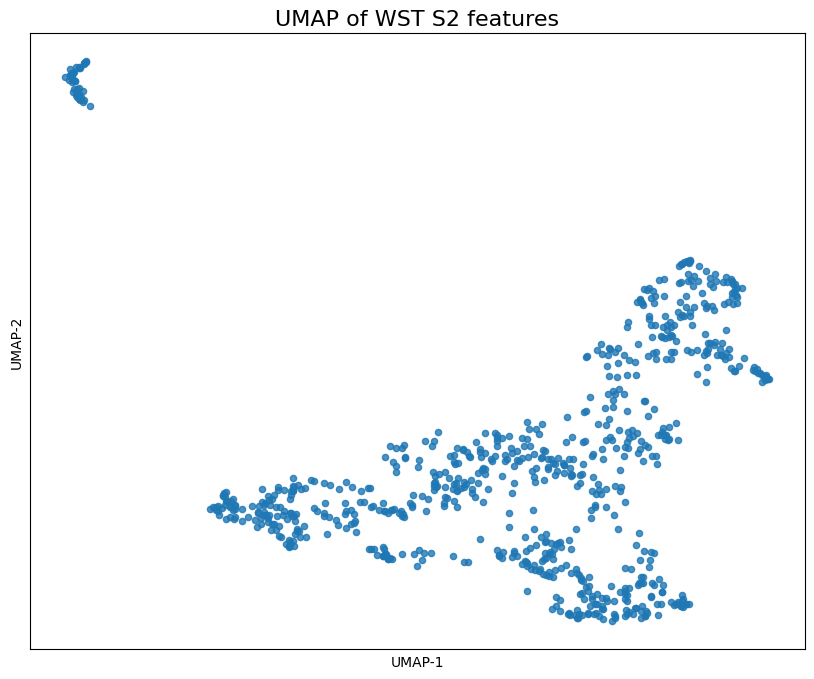

In [36]:
from sklearn.preprocessing import StandardScaler

# -------------------------------------------------------
# 1) Load S2 representation from saved .npz
# -------------------------------------------------------
npz = np.load("/content/GPU_WST_S1S2_both.npz", allow_pickle=True)

S2 = npz["S2"]      # shape (N, n2, T)
names = npz["names"]

print("Loaded S2:", S2.shape)

# -------------------------------------------------------
# 2) Flatten S2 per cell  → shape (N, n2*T)
# -------------------------------------------------------
N, n2, T = S2.shape
S_flat = S2.reshape(N, n2 * T)

print("Flattened S2:", S_flat.shape)

# -------------------------------------------------------
# 3) Standardize features (recommended before UMAP)
# -------------------------------------------------------
scaler = StandardScaler()
S_std = scaler.fit_transform(S_flat)

print("Standardized feature matrix:", S_std.shape)

# -------------------------------------------------------
# 4) Run UMAP
# -------------------------------------------------------
reducer = umap.UMAP(
    n_neighbors=25,
    min_dist=0.1,
    n_components=2,
    random_state=42
)

embedding = reducer.fit_transform(S_std)   # shape (N, 2)

print("UMAP embedding:", embedding.shape)

# -------------------------------------------------------
# 5) Plot
# -------------------------------------------------------
plt.figure(figsize=(10, 8))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s=20,
    alpha=0.8,
    cmap="Spectral"
)

plt.title("UMAP of WST S2 features", fontsize=16)
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.xticks([])
plt.yticks([])
plt.show()

Loaded S1: (790, 56, 49)
Loaded S2: (790, 209, 49)
Flattened S1: (790, 2744)
Flattened S2: (790, 10241)
Concatenated feature matrix: (790, 12985)
Standardized: (790, 12985)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP embedding S1+S2: (790, 2)


/tmp/ipython-input-4185474767.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


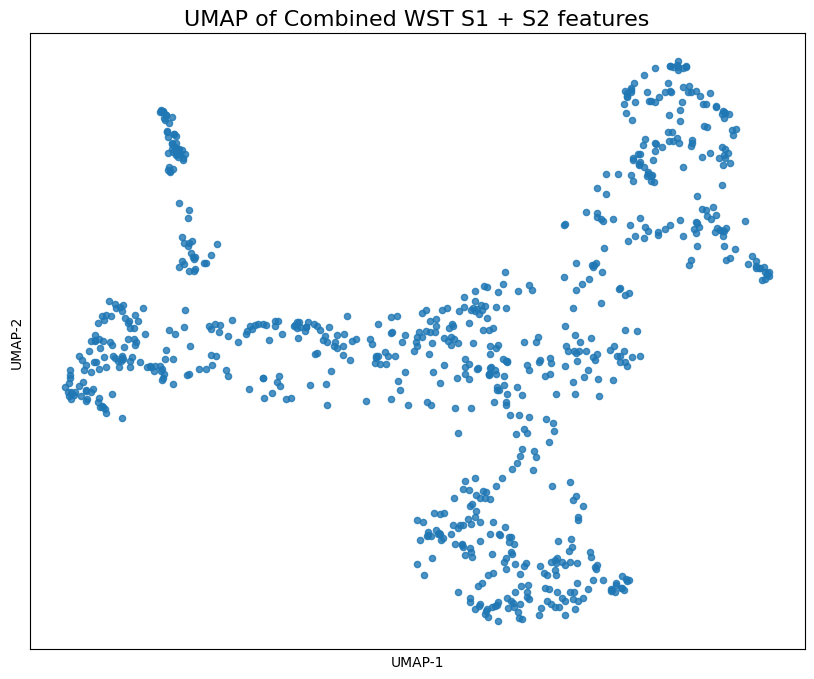

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap

# -------------------------------------------------------
# 1) Load S1 and S2 from saved .npz
# -------------------------------------------------------
npz = np.load("/content/GPU_WST_S1S2_both.npz", allow_pickle=True)

S1 = npz["S1"]      # (N, n1, T)
S2 = npz["S2"]      # (N, n2, T)
names = npz["names"]

print("Loaded S1:", S1.shape)
print("Loaded S2:", S2.shape)

# -------------------------------------------------------
# 2) Flatten feature tensors
# -------------------------------------------------------
N, n1, T1 = S1.shape
_, n2, T2 = S2.shape

flat_S1 = S1.reshape(N, n1 * T1)   # (N, n1*T)
flat_S2 = S2.reshape(N, n2 * T2)   # (N, n2*T)

print("Flattened S1:", flat_S1.shape)
print("Flattened S2:", flat_S2.shape)

# -------------------------------------------------------
# 3) Concatenate S1 + S2
# -------------------------------------------------------
S_concat = np.concatenate([flat_S1, flat_S2], axis=1)  # shape (N, total_features)

print("Concatenated feature matrix:", S_concat.shape)

# -------------------------------------------------------
# 4) Standardize
# -------------------------------------------------------
scaler = StandardScaler()
S_std = scaler.fit_transform(S_concat)

print("Standardized:", S_std.shape)

# -------------------------------------------------------
# 5) Run UMAP
# -------------------------------------------------------
reducer = umap.UMAP(
    n_neighbors=25,
    min_dist=0.1,
    n_components=2,
    random_state=42
)

embedding_S1S2 = reducer.fit_transform(S_std)

print("UMAP embedding S1+S2:", embedding_S1S2.shape)

# -------------------------------------------------------
# 6) Plot
# -------------------------------------------------------
plt.figure(figsize=(10, 8))
plt.scatter(
    embedding_S1S2[:, 0],
    embedding_S1S2[:, 1],
    s=20,
    alpha=0.8,
    cmap="Spectral"
)

plt.title("UMAP of Combined WST S1 + S2 features", fontsize=16)
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.xticks([])
plt.yticks([])
plt.show()


Embedding shape: (790, 2)
Number of names: 790
                                                name           short_id  \
0  sub-mouse-EUNBK_ses-20190516-sample-5_slice-20...  20190516_sample_5   
1  sub-mouse-EUNBK_ses-20190516-sample-4_slice-20...  20190516_sample_4   
2  sub-mouse-EUNBK_ses-20190516-sample-2_slice-20...  20190516_sample_2   
3  sub-mouse-EUNBK_ses-20190516-sample-6_slice-20...  20190516_sample_6   
4  sub-mouse-CUEES_ses-20190821-sample-3_slice-20...  20190821_sample_3   

      UMAP1     UMAP2  
0  2.397256 -1.701982  
1  3.755319  1.358552  
2  1.510342  1.336913  
3 -0.150428  1.085239  
4  3.190605 -1.629690  
Metadata columns: ['Number', 'Cell', 'Slice', 'Date', 'Sample', 'Mouse', 'Mouse date of birth', 'Mouse age', 'Mouse gender', 'Mouse genotype', 'Targeted layer', 'Inferred layer', 'Cre', 'Exon reads', 'Intron reads', 'Intergenic reads', 'Sequencing batch', 'Number of genes detected', 'RNA family', 'RNA type', 'RNA type confidence', 'RNA type top-3', 'ALM/VI

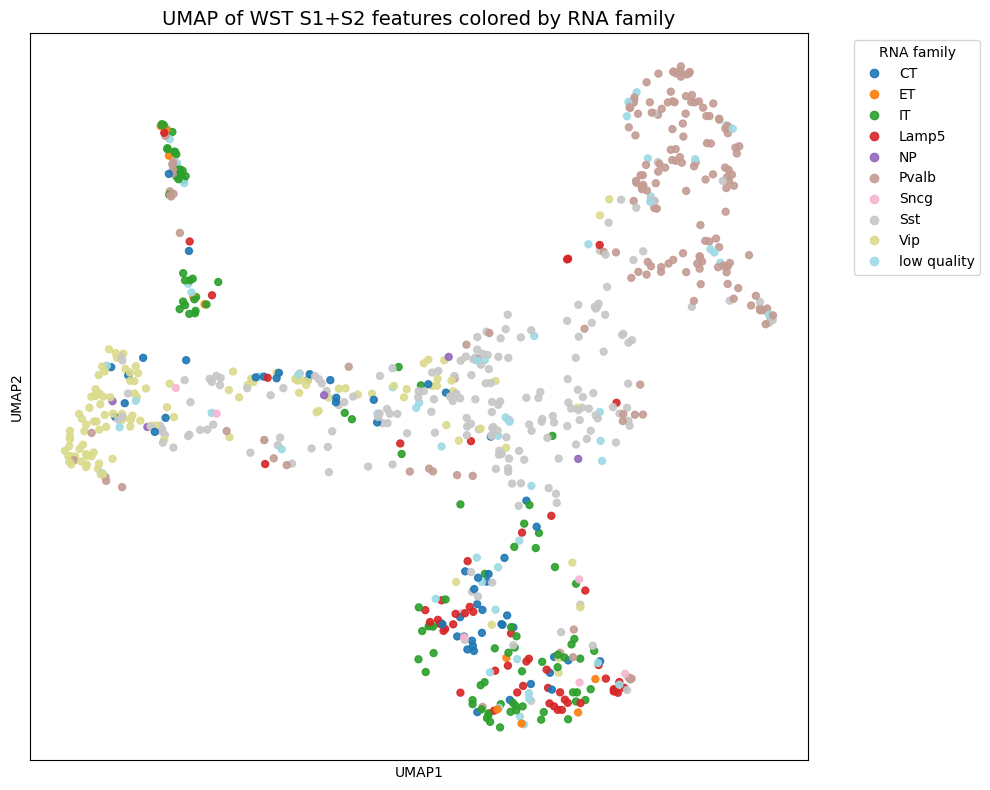

In [38]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


N = len(names)
print("Embedding shape:", embedding_S1S2.shape)
print("Number of names:", N)



def long_id_to_short_id(cid: str):
    """
    Example:
    'sub-mouse-XXX_ses-20180420-sample-2_icephys_sweep20'
    --> '20180420_sample_2'
    """
    if not isinstance(cid, str):
        return None
    cid = cid.strip()
    m = re.search(r"ses-(\d+)-sample-(\d+)", cid)
    if m:
        date = m.group(1)
        samp = m.group(2)
        return f"{date}_sample_{samp}"
    return None

short_ids_umap = [long_id_to_short_id(n) for n in names]

# ---------------------------------------------
# 3) Build a DataFrame for the UMAP embedding
# ---------------------------------------------
df_umap = pd.DataFrame({
    "name": names,
    "short_id": short_ids_umap,
    "UMAP1": embedding_S1S2[:, 0],
    "UMAP2": embedding_S1S2[:, 1],
})

print(df_umap.head())

# ---------------------------------------------
# 4) Load RNA metadata (same file as in your DMD scri
META_PATH = "/content/m1_patchseq_meta_data (1).csv"

meta = pd.read_csv(META_PATH, sep="\t")
print("Metadata columns:", list(meta.columns))

# In your old script, 'Cell' contained short_id like '20171204_sample_2'
if "Cell" not in meta.columns:
    raise ValueError("Metadata file must contain a 'Cell' column with short_id.")

meta = meta.rename(columns={"Cell": "short_id"})
meta["short_id"] = meta["short_id"].astype(str).str.strip()

# Find the correct 'RNA family' column (handle small variations in name)
rna_family_col = None
for c in meta.columns:
    if c.strip().lower().replace(" ", "") == "rnafamily":
        rna_family_col = c
        break

if rna_family_col is None:
    raise ValueError("Could not find an 'RNA family' column in metadata.")

print("Using RNA family column:", rna_family_col)

# ---------------------------------------------
# 5) Merge UMAP with metadata on 'short_id'
# ---------------------------------------------
merged = df_umap.merge(
    meta[["short_id", rna_family_col]],
    on="short_id",
    how="left"
)

merged = merged.rename(columns={rna_family_col: "RNA_family"})

print("Merged shape:", merged.shape)
print("Unlabeled cells:", merged["RNA_family"].isna().sum())
print(merged[["name", "short_id", "RNA_family"]].head())

# ---------------------------------------------
# 6) Plot UMAP colored by RNA family
#    (labeled cells in color, unlabeled in light gray)
# ---------------------------------------------
plt.figure(figsize=(10, 8))

# Mask for labeled vs unlabeled
mask_labeled = merged["RNA_family"].notna()
mask_unlabeled = ~mask_labeled

# Labeled cells: map categories to integer codes
cat = merged.loc[mask_labeled, "RNA_family"].astype("category")
codes = cat.cat.codes

# Plot unlabeled in gray
plt.scatter(
    merged.loc[mask_unlabeled, "UMAP1"],
    merged.loc[mask_unlabeled, "UMAP2"],
    s=15,
    alpha=0.3,
    color="lightgray",
    label="No RNA label"
)

# Plot labeled with colormap
scatter = plt.scatter(
    merged.loc[mask_labeled, "UMAP1"],
    merged.loc[mask_labeled, "UMAP2"],
    c=codes,
    s=25,
    alpha=0.9,
    cmap="tab20"
)

plt.title("UMAP of WST S1+S2 features colored by RNA family", fontsize=14)
plt.xlabel("UMAP1"); plt.ylabel("UMAP2")
plt.xticks([]); plt.yticks([])

# Build legend from categories
handles, _ = scatter.legend_elements()
legend_labels = cat.cat.categories
plt.legend(handles, legend_labels, title="RNA family", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


Embedding S1 shape: (790, 2)
Number of names: 790
Preview embedding table:
                                                name           short_id  \
0  sub-mouse-EUNBK_ses-20190516-sample-5_slice-20...  20190516_sample_5   
1  sub-mouse-EUNBK_ses-20190516-sample-4_slice-20...  20190516_sample_4   
2  sub-mouse-EUNBK_ses-20190516-sample-2_slice-20...  20190516_sample_2   
3  sub-mouse-EUNBK_ses-20190516-sample-6_slice-20...  20190516_sample_6   
4  sub-mouse-CUEES_ses-20190821-sample-3_slice-20...  20190821_sample_3   

      UMAP1     UMAP2  
0 -0.331772 -0.935364  
1  2.758216 -0.447100  
2  0.364676 -0.527235  
3 -0.278421  1.715373  
4  0.074702 -2.580387  
Metadata columns:
['Number', 'Cell', 'Slice', 'Date', 'Sample', 'Mouse', 'Mouse date of birth', 'Mouse age', 'Mouse gender', 'Mouse genotype', 'Targeted layer', 'Inferred layer', 'Cre', 'Exon reads', 'Intron reads', 'Intergenic reads', 'Sequencing batch', 'Number of genes detected', 'RNA family', 'RNA type', 'RNA type confidence

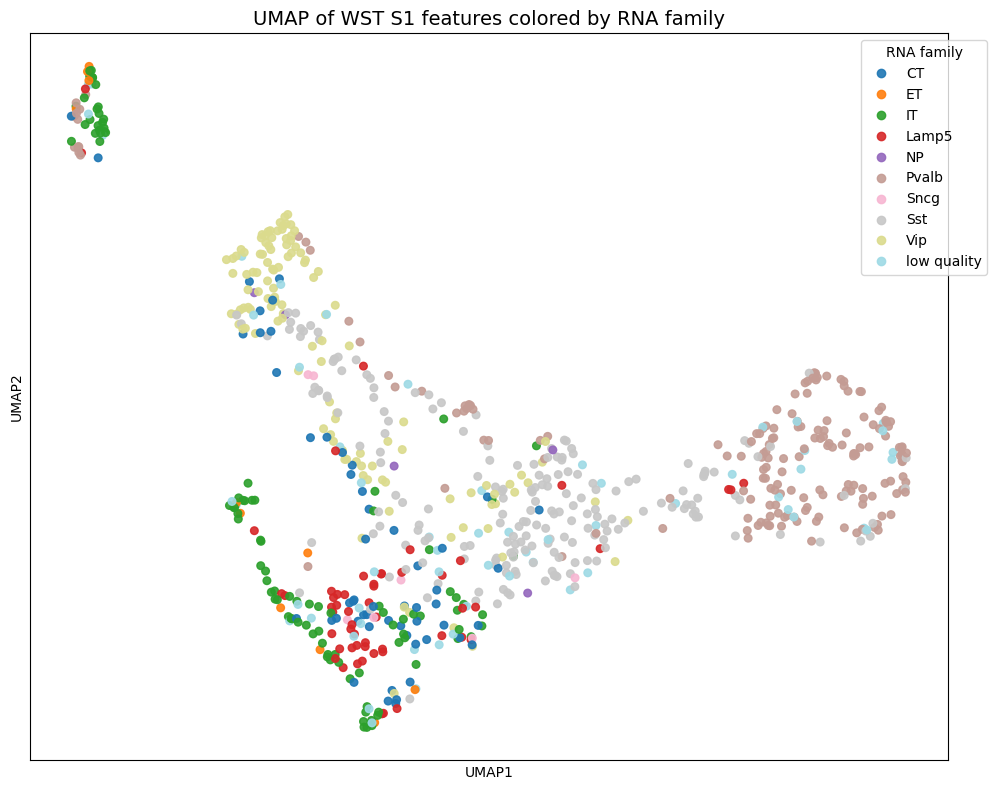

In [39]:

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------
N = len(names)
print("Embedding S1 shape:", embedding_S1.shape)
print("Number of names:", N)

# ---------------------------------------------------
# 2) Convert long IDs → short_id
# ---------------------------------------------------
def long_id_to_short_id(cid: str):
    """
    Example:
    'sub-xxx_ses-20180420-sample-2_icephys_sweep20'
      →  '20180420_sample_2'
    """
    if not isinstance(cid, str):
        return None
    cid = cid.strip()
    m = re.search(r"ses-(\d+)-sample-(\d+)", cid)
    if m:
        date = m.group(1)
        samp = m.group(2)
        return f"{date}_sample_{samp}"
    return None

short_ids_S1 = [long_id_to_short_id(n) for n in names]

# ---------------------------------------------------
# 3) Build dataframe for UMAP S1
# ---------------------------------------------------
df_S1 = pd.DataFrame({
    "name": names,
    "short_id": short_ids_S1,
    "UMAP1": embedding_S1[:, 0],
    "UMAP2": embedding_S1[:, 1]
})

print("Preview embedding table:")
print(df_S1.head())

# ---------------------------------------------------
# ---------------------------------------------------
META_PATH = "/content/m1_patchseq_meta_data (1).csv"
meta = pd.read_csv(META_PATH, sep="\t")

print("Metadata columns:")
print(list(meta.columns))

# rename metadata column to match
if "Cell" not in meta.columns:
    raise ValueError("Metadata file missing required 'Cell' column.")

meta = meta.rename(columns={"Cell": "short_id"})
meta["short_id"] = meta["short_id"].astype(str).str.strip()

# detect correct RNA family column
rna_family_col = None
for c in meta.columns:
    if c.strip().lower().replace(" ", "") == "rnafamily":
        rna_family_col = c
        break

if rna_family_col is None:
    raise ValueError("No RNA family column found in metadata!")

print("Using RNA family column:", rna_family_col)

# ---------------------------------------------------
# 5) Merge UMAP embedding with metadata using short_id
# ---------------------------------------------------
merged_S1 = df_S1.merge(
    meta[["short_id", rna_family_col]],
    on="short_id",
    how="left"
)

merged_S1 = merged_S1.rename(columns={rna_family_col: "RNA_family"})

print("Merged shape:", merged_S1.shape)
print("Unlabeled cells:", merged_S1["RNA_family"].isna().sum())
print(merged_S1.head())

# ---------------------------------------------------
# 6) Plot UMAP colored by RNA family labels
# ---------------------------------------------------
plt.figure(figsize=(10, 8))

mask_labeled   = merged_S1["RNA_family"].notna()
mask_unlabeled = ~mask_labeled

# unlabeled = gray
plt.scatter(
    merged_S1.loc[mask_unlabeled, "UMAP1"],
    merged_S1.loc[mask_unlabeled, "UMAP2"],
    s=15,
    alpha=0.3,
    color="lightgray",
    label="No label"
)

# labeled = colors
cat  = merged_S1.loc[mask_labeled, "RNA_family"].astype("category")
codes = cat.cat.codes

scatter = plt.scatter(
    merged_S1.loc[mask_labeled, "UMAP1"],
    merged_S1.loc[mask_labeled, "UMAP2"],
    c=codes,
    cmap="tab20",
    s=30,
    alpha=0.9
)

plt.title("UMAP of WST S1 features colored by RNA family", fontsize=14)
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.xticks([]); plt.yticks([])

# legend
handles, _ = scatter.legend_elements()
legend_labels = cat.cat.categories
plt.legend(handles, legend_labels, title="RNA family", bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()


S2 tensor: (790, 209, 49)
Names loaded: 790
Flattened S2: (790, 10241)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP S2 computed: (790, 2)
                                                name           short_id  \
0  sub-mouse-EUNBK_ses-20190516-sample-5_slice-20...  20190516_sample_5   
1  sub-mouse-EUNBK_ses-20190516-sample-4_slice-20...  20190516_sample_4   
2  sub-mouse-EUNBK_ses-20190516-sample-2_slice-20...  20190516_sample_2   
3  sub-mouse-EUNBK_ses-20190516-sample-6_slice-20...  20190516_sample_6   
4  sub-mouse-CUEES_ses-20190821-sample-3_slice-20...  20190821_sample_3   

      UMAP1     UMAP2  
0  5.495302  0.240688  
1  6.768356  2.958421  
2  4.609100  1.989254  
3  3.237359  2.659232  
4  6.372887  0.028204  
Merged: (790, 5)
Unlabeled cells: 0


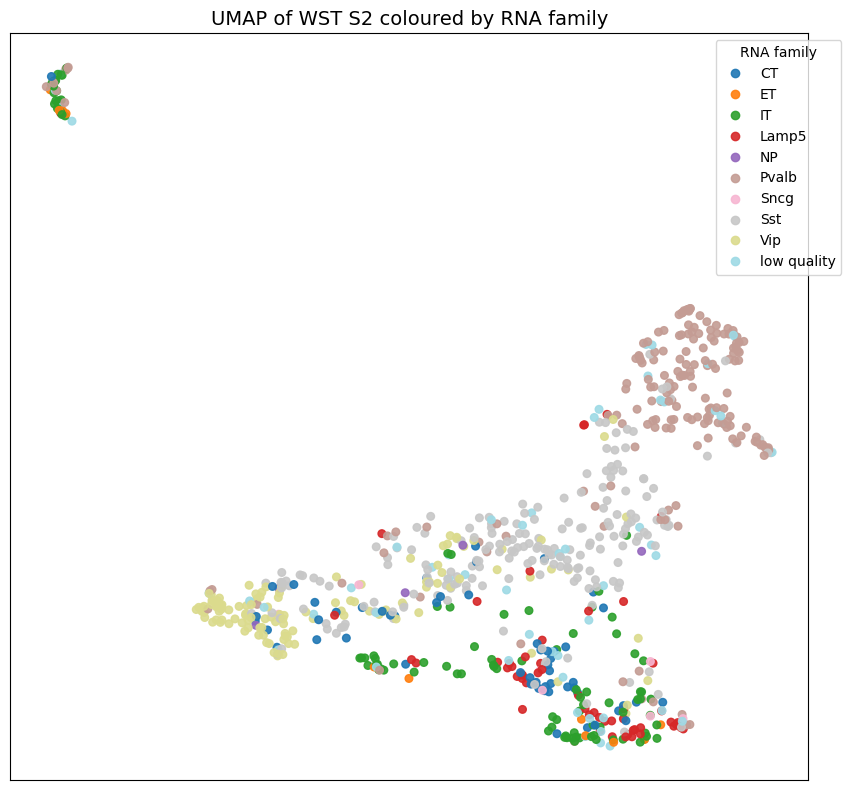

In [40]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler
import re


# ---------------------------------------------------
# 1) Check S2 exists
# ---------------------------------------------------
try:
    S2
except NameError:
    raise RuntimeError("❌ S2 is NOT loaded. Load your GPU_WST_S1S2_both.npz first!!")

print("S2 tensor:", S2.shape)
print("Names loaded:", len(names))

# ---------------------------------------------------
# 2) Flatten S2 features (N, n2*T)
# ---------------------------------------------------
N, n2, T = S2.shape
flat_S2 = S2.reshape(N, n2 * T)

print("Flattened S2:", flat_S2.shape)

# ---------------------------------------------------
# 3) Normalize features
# ---------------------------------------------------
scaler = StandardScaler()
S2_std = scaler.fit_transform(flat_S2)

# ---------------------------------------------------
# 4) Run UMAP
# ---------------------------------------------------
reducer = umap.UMAP(
    n_neighbors=25,
    min_dist=0.1,
    n_components=2,
    random_state=42
)

embedding_S2 = reducer.fit_transform(S2_std)

print("UMAP S2 computed:", embedding_S2.shape)

# ---------------------------------------------------
# 5) Convert names → short_id
# ---------------------------------------------------
def long_id_to_short_id(cid: str):
    cid = str(cid).strip()
    m = re.search(r"ses-(\d+)-sample-(\d+)", cid)
    if m:
        return f"{m.group(1)}_sample_{m.group(2)}"
    return None

short_id_S2 = [long_id_to_short_id(n) for n in names]

df_S2 = pd.DataFrame({
    "name": names,
    "short_id": short_id_S2,
    "UMAP1": embedding_S2[:, 0],
    "UMAP2": embedding_S2[:, 1]
})

print(df_S2.head())

# ---------------------------------------------------
# 6) Load metadata
# ---------------------------------------------------
META_PATH = "/content/m1_patchseq_meta_data (1).csv"
meta = pd.read_csv(META_PATH, sep="\t")

meta = meta.rename(columns={"Cell": "short_id"})
meta["short_id"] = meta["short_id"].astype(str).str.strip()

# detect RNA family column
rna_family_col = None
for c in meta.columns:
    if c.strip().lower().replace(" ", "") == "rnafamily":
        rna_family_col = c
        break

if rna_family_col is None:
    raise ValueError("❌ RNA family column missing in metadata")

# ---------------------------------------------------
# 7) Merge S2 UMAP with metadata
# ---------------------------------------------------
merged_S2 = df_S2.merge(
    meta[["short_id", rna_family_col]],
    on="short_id",
    how="left"
).rename(columns={rna_family_col: "RNA_family"})

print("Merged:", merged_S2.shape)
print("Unlabeled cells:", merged_S2["RNA_family"].isna().sum())

# ---------------------------------------------------
# 8) Plot colouring by RNA family
# ---------------------------------------------------
plt.figure(figsize=(10, 8))

mask_labeled   = merged_S2["RNA_family"].notna()
mask_unlabeled = ~mask_labeled

# unlabeled = grey
plt.scatter(
    merged_S2.loc[mask_unlabeled, "UMAP1"],
    merged_S2.loc[mask_unlabeled, "UMAP2"],
    s=15,
    alpha=0.3,
    color="lightgray"
)

# labeled = coloured
cat = merged_S2.loc[mask_labeled, "RNA_family"].astype("category")
codes = cat.cat.codes

scatter = plt.scatter(
    merged_S2.loc[mask_labeled, "UMAP1"],
    merged_S2.loc[mask_labeled, "UMAP2"],
    c=codes,
    cmap="tab20",
    s=30,
    alpha=0.9
)

plt.title("UMAP of WST S2 coloured by RNA family", fontsize=14)
plt.xticks([]); plt.yticks([])

# add legend
handles, _ = scatter.legend_elements()
legend_labels = cat.cat.categories
plt.legend(handles, legend_labels, bbox_to_anchor=(1.05, 1), title="RNA family")

plt.tight_layout()
plt.show()


Trace matrix: (25000, 790)
PCA retained components: 257


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP embedding: (790, 2)
                                                name           short_id  \
0  sub-mouse-EUNBK_ses-20190516-sample-5_slice-20...  20190516_sample_5   
1  sub-mouse-EUNBK_ses-20190516-sample-4_slice-20...  20190516_sample_4   
2  sub-mouse-EUNBK_ses-20190516-sample-2_slice-20...  20190516_sample_2   
3  sub-mouse-EUNBK_ses-20190516-sample-6_slice-20...  20190516_sample_6   
4  sub-mouse-CUEES_ses-20190821-sample-3_slice-20...  20190821_sample_3   

      UMAP1     UMAP2  
0 -8.644305  2.864990  
1 -8.393273  1.610267  
2 -8.794011  2.855270  
3 -6.529104  4.427405  
4 -8.982277  2.329239  
Merged: (790, 5)
Unlabeled cells: 0


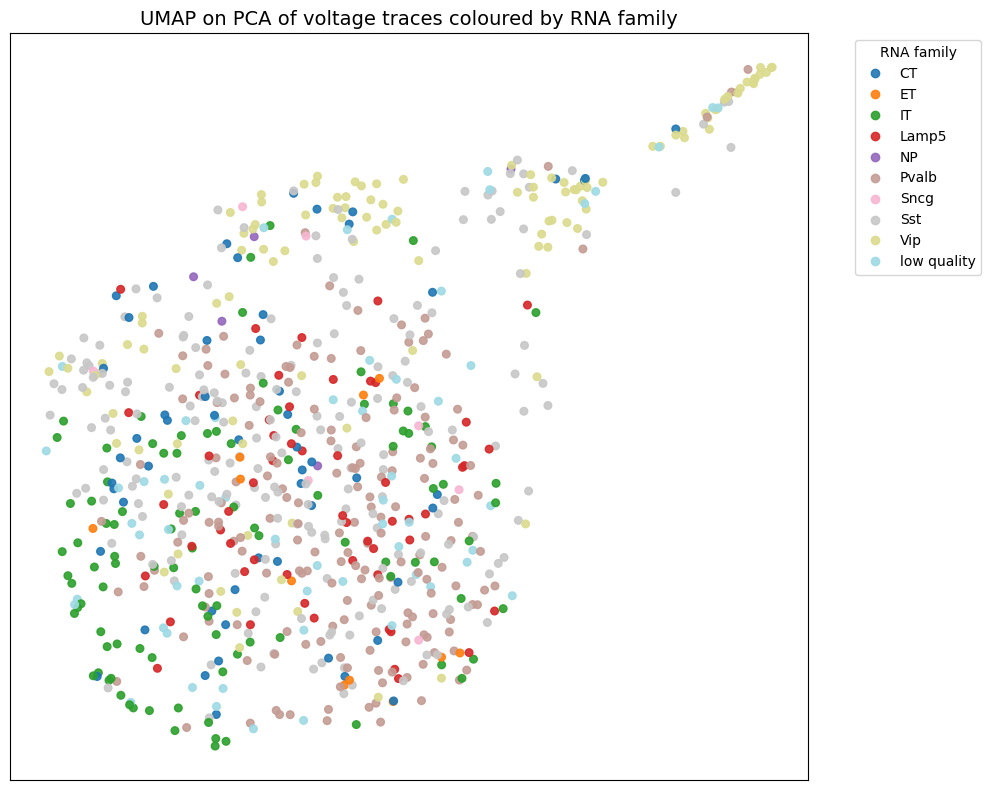

In [41]:
# ======================================================
# 📌 FULL PIPELINE (raw trace → PCA 95% → UMAP → colored plot)
# ======================================================


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import re

# ======================================================
# 1) Load voltage traces  (Cells × time)
# ======================================================
df = pd.read_csv("voltage___traces2345.csv", index_col=0)

print("Trace matrix:", df.shape)  # (time, cells)

# (cells, time)
X = df.T.values
names = df.columns.astype(str)

# ======================================================
# 2) PCA keeping 95% explained variance
# ======================================================
pca = PCA(n_components=0.95, svd_solver='full')
X_pca = pca.fit_transform(X)

print("PCA retained components:", X_pca.shape[1])

# ======================================================
# 3) Standardize before UMAP
# ======================================================
scaler = StandardScaler()
X_pca_std = scaler.fit_transform(X_pca)

# ======================================================
# 4) UMAP on PCA manifold
# ======================================================
reducer = umap.UMAP(
    n_neighbors=25,
    min_dist=0.1,
    n_components=2,
    random_state=42
)

embedding = reducer.fit_transform(X_pca_std)
print("UMAP embedding:", embedding.shape)

# ======================================================
# 5) Convert long NWB id → short_id like "YYYYMMDD_sample_X"
# ======================================================
def to_short_id(cid):
    cid = str(cid).strip()
    m = re.search(r"ses-(\d+)-sample-(\d+)", cid)
    if m:
        return f"{m.group(1)}_sample_{m.group(2)}"
    return None

short_ids = [to_short_id(n) for n in names]

df_umap = pd.DataFrame({
    "name": names,
    "short_id": short_ids,
    "UMAP1": embedding[:, 0],
    "UMAP2": embedding[:, 1]
})

print(df_umap.head())

# ======================================================
# 6) Load RNA family metadata
# ======================================================
META_PATH = "/content/m1_patchseq_meta_data (1).csv"
meta = pd.read_csv(META_PATH, sep="\t")

# normalize short_id column
meta = meta.rename(columns={"Cell": "short_id"})
meta["short_id"] = meta["short_id"].astype(str).str.strip()

# find correct RNA family column
rna_col = None
for c in meta.columns:
    if c.strip().lower().replace(" ", "") == "rnafamily":
        rna_col = c
        break

if rna_col is None:
    raise RuntimeError("❌ RNA family column not found in metadata")

# ======================================================
# 7) Merge UMAP with RNA labels
# ======================================================
merged = df_umap.merge(
    meta[["short_id", rna_col]],
    on="short_id",
    how="left"
).rename(columns={rna_col: "RNA_family"})

print("Merged:", merged.shape)
print("Unlabeled cells:", merged["RNA_family"].isna().sum())

# ======================================================
# 8) Plot UMAP coloured by RNA family
# ======================================================
plt.figure(figsize=(10, 8))

mask_lab  = merged["RNA_family"].notna()
mask_un   = ~mask_lab

# Unlabeled points = grey
plt.scatter(
    merged.loc[mask_un, "UMAP1"],
    merged.loc[mask_un, "UMAP2"],
    s=18, alpha=0.3, color="lightgray", label="No label"
)

# Labeled = colour coded
cat = merged.loc[mask_lab, "RNA_family"].astype("category")
codes = cat.cat.codes

scatter = plt.scatter(
    merged.loc[mask_lab, "UMAP1"],
    merged.loc[mask_lab, "UMAP2"],
    c=codes,
    cmap="tab20",
    s=30,
    alpha=0.9
)

plt.title("UMAP on PCA of voltage traces coloured by RNA family", fontsize=14)
plt.xticks([]); plt.yticks([])

# Add legend
handles, _ = scatter.legend_elements()
plt.legend(
    handles, cat.cat.categories,
    title="RNA family",
    bbox_to_anchor=(1.05, 1), loc="upper left"
)

plt.tight_layout()
plt.show()


Trace matrix: (25000, 790)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP embedding: (790, 2)
                                                name           short_id  \
0  sub-mouse-EUNBK_ses-20190516-sample-5_slice-20...  20190516_sample_5   
1  sub-mouse-EUNBK_ses-20190516-sample-4_slice-20...  20190516_sample_4   
2  sub-mouse-EUNBK_ses-20190516-sample-2_slice-20...  20190516_sample_2   
3  sub-mouse-EUNBK_ses-20190516-sample-6_slice-20...  20190516_sample_6   
4  sub-mouse-CUEES_ses-20190821-sample-3_slice-20...  20190821_sample_3   

      UMAP1     UMAP2  
0  6.465991 -0.804804  
1  5.108700 -1.074135  
2  6.408249 -0.312280  
3  6.546649 -0.895687  
4  5.646189 -0.655180  
Merged: (790, 5)
Unlabeled cells: 0


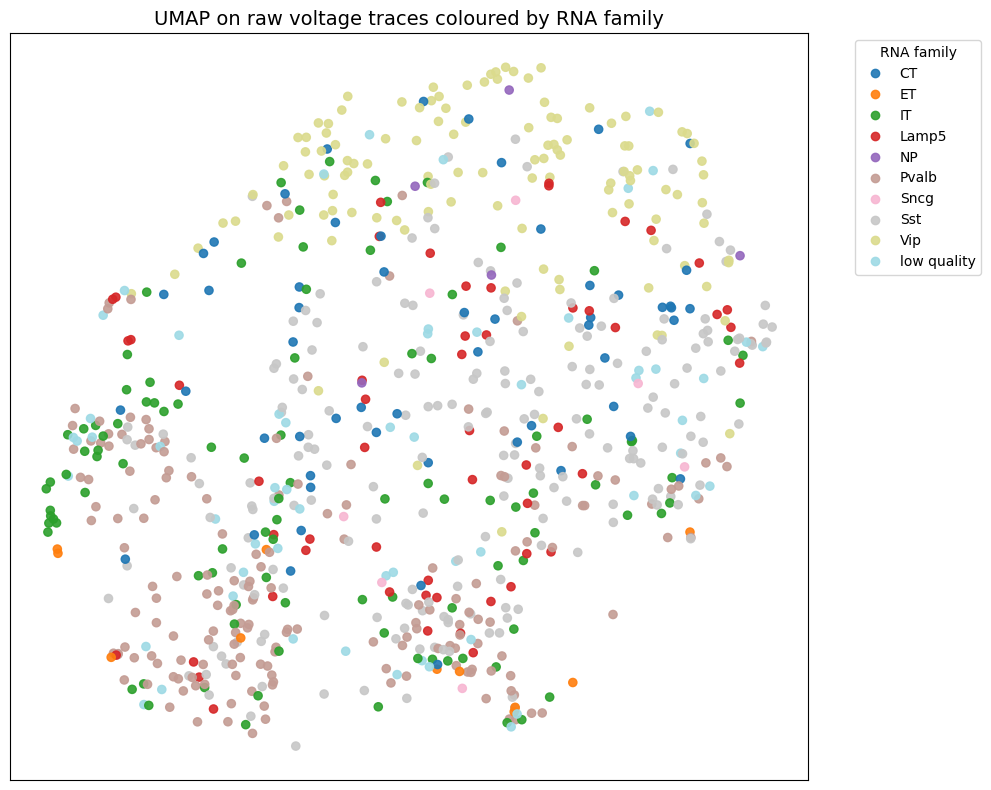

In [42]:
# ======================================================
# 📌 FULL PIPELINE — RAW VOLTAGE → UMAP → RNA LABEL COLORING
# ======================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler
import re

# ======================================================
# 1) Load voltage traces  (time × cells)
# ======================================================
df = pd.read_csv("voltage___traces2345.csv", index_col=0)

print("Trace matrix:", df.shape)  # (time, cells)

# convert to (cells × time)
X = df.T.values
names = df.columns.astype(str)

# ======================================================
# 2) Normalize voltage signals per cell
# ======================================================
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# ======================================================
# 3) UMAP directly on normalized raw traces
# ======================================================
reducer = umap.UMAP(
    n_neighbors=25,
    min_dist=0.1,
    n_components=2,
    random_state=42
)

embedding_raw = reducer.fit_transform(X_std)
print("UMAP embedding:", embedding_raw.shape)

# ======================================================
# 4) Convert names → short_id ("YYYYMMDD_sample_X")
# ======================================================
def to_short_id(cid):
    cid = str(cid).strip()
    m = re.search(r"ses-(\d+)-sample-(\d+)", cid)
    if m:
        return f"{m.group(1)}_sample_{m.group(2)}"
    return None

short_ids = [to_short_id(n) for n in names]

df_umap = pd.DataFrame({
    "name": names,
    "short_id": short_ids,
    "UMAP1": embedding_raw[:, 0],
    "UMAP2": embedding_raw[:, 1]
})

print(df_umap.head())

# ======================================================
# 5) Load RNA-seq metadata
# ======================================================
META_PATH = "/content/m1_patchseq_meta_data (1).csv"
meta = pd.read_csv(META_PATH, sep="\t")

meta = meta.rename(columns={"Cell": "short_id"})
meta["short_id"] = meta["short_id"].astype(str).str.strip()

# detect RNA family column
rna_col = None
for c in meta.columns:
    if c.strip().lower().replace(" ", "") == "rnafamily":
        rna_col = c
        break

if rna_col is None:
    raise RuntimeError("❌ No RNA family column found in metadata")

# ======================================================
# 6) Merge UMAP + metadata labels
# ======================================================
merged = df_umap.merge(
    meta[["short_id", rna_col]],
    on="short_id",
    how="left"
).rename(columns={rna_col: "RNA_family"})

print("Merged:", merged.shape)
print("Unlabeled cells:", merged["RNA_family"].isna().sum())

# ======================================================
# 7) Plot UMAP coloured by RNA family labels
# ======================================================
plt.figure(figsize=(10, 8))

mask_lab = merged["RNA_family"].notna()
mask_un  = ~mask_lab

# unlabeled cells = grey
plt.scatter(
    merged.loc[mask_un, "UMAP1"],
    merged.loc[mask_un, "UMAP2"],
    s=18, alpha=0.3, color="lightgray", label="No label"
)

# labeled = colour-coded
cat = merged.loc[mask_lab, "RNA_family"].astype("category")
codes = cat.cat.codes

scatter = plt.scatter(
    merged.loc[mask_lab, "UMAP1"],
    merged.loc[mask_lab, "UMAP2"],
    c=codes,
    cmap="tab20",
    s=35,
    alpha=0.9
)

plt.title("UMAP on raw voltage traces coloured by RNA family", fontsize=14)
plt.xticks([]); plt.yticks([])

# build legend
handles, _ = scatter.legend_elements()
legend_labels = cat.cat.categories
plt.legend(handles, legend_labels, bbox_to_anchor=(1.05, 1), title="RNA family")

plt.tight_layout()
plt.show()


Original trace matrix: (25000, 790)
Downsampled matrix: (2500, 790)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP embedding: (790, 2)
                                                name           short_id  \
0  sub-mouse-EUNBK_ses-20190516-sample-5_slice-20...  20190516_sample_5   
1  sub-mouse-EUNBK_ses-20190516-sample-4_slice-20...  20190516_sample_4   
2  sub-mouse-EUNBK_ses-20190516-sample-2_slice-20...  20190516_sample_2   
3  sub-mouse-EUNBK_ses-20190516-sample-6_slice-20...  20190516_sample_6   
4  sub-mouse-CUEES_ses-20190821-sample-3_slice-20...  20190821_sample_3   

      UMAP1     UMAP2  
0  3.313247  9.192946  
1  4.628985  9.671858  
2  3.485732  8.649164  
3  3.164951  9.464681  
4  4.172095  9.207531  
Merged: (790, 5)
Unlabeled cells: 0


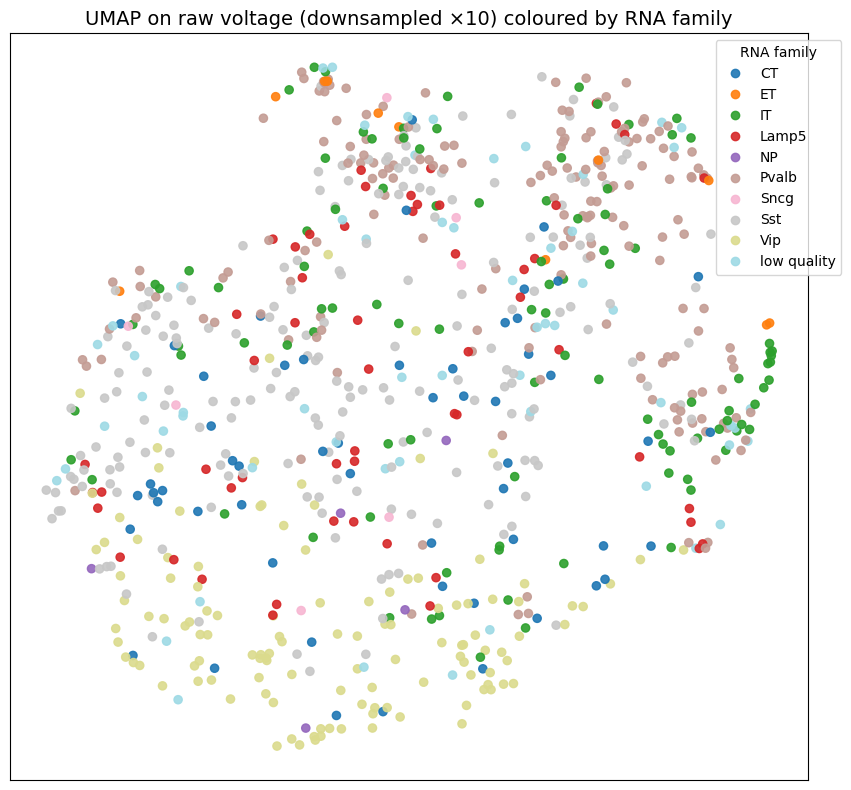

In [43]:
# =====================================================================
# RAW SIGNAL → DOWNSAMPLE(10) → UMAP → RNA FAMILY COLOURED PLOT
# =====================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler
import re

# =====================================================================
# 1) Load raw voltage traces  (time × cells)
# =====================================================================
df = pd.read_csv("voltage___traces2345.csv", index_col=0)

print("Original trace matrix:", df.shape)  # (time, cells)

# =====================================================================
# 2) Downsample time axis by factor 10
# =====================================================================

# keep every 10th sample → downsampling
df_ds = df.iloc[::10, :]

print("Downsampled matrix:", df_ds.shape)  # (time/10, cells)

# =====================================================================
# 3) Convert to (cells × time)
# =====================================================================
X = df_ds.T.values
names = df_ds.columns.astype(str)

# =====================================================================
# 4) Normalize per cell
# =====================================================================
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# =====================================================================
# 5) UMAP
# =====================================================================
reducer = umap.UMAP(
    n_neighbors=25,
    min_dist=0.1,
    n_components=2,
    random_state=42
)

embedding_ds = reducer.fit_transform(X_std)
print("UMAP embedding:", embedding_ds.shape)

# =====================================================================
# 6) Convert long NWB name → short_id("YYYYMMDD_sample_X")
# =====================================================================
def to_short_id(cid):
    cid = str(cid).strip()
    m = re.search(r"ses-(\d+)-sample-(\d+)", cid)
    if m:
        return f"{m.group(1)}_sample_{m.group(2)}"
    return None

short_ids = [to_short_id(n) for n in names]

df_umap = pd.DataFrame({
    "name": names,
    "short_id": short_ids,
    "UMAP1": embedding_ds[:, 0],
    "UMAP2": embedding_ds[:, 1]
})

print(df_umap.head())

# =====================================================================
# 7) Load RNA family metadata
# =====================================================================
META_PATH = "/content/m1_patchseq_meta_data (1).csv"
meta = pd.read_csv(META_PATH, sep="\t")

meta = meta.rename(columns={"Cell": "short_id"})
meta["short_id"] = meta["short_id"].astype(str).str.strip()

# find RNA family column
rna_col = None
for c in meta.columns:
    if c.strip().lower().replace(" ", "") == "rnafamily":
        rna_col = c
        break

if rna_col is None:
    raise RuntimeError("❌ RNA family column not found in metadata")

# =====================================================================
# 8) Merge UMAP + metadata labels
# =====================================================================
merged = df_umap.merge(
    meta[["short_id", rna_col]],
    on="short_id",
    how="left"
).rename(columns={rna_col: "RNA_family"})

print("Merged:", merged.shape)
print("Unlabeled cells:", merged["RNA_family"].isna().sum())

# =====================================================================
# 9) Plot UMAP coloured by RNA family labels
# =====================================================================
plt.figure(figsize=(10, 8))

mask_lab = merged["RNA_family"].notna()
mask_un  = ~mask_lab

# unlabeled grey
plt.scatter(
    merged.loc[mask_un, "UMAP1"],
    merged.loc[mask_un, "UMAP2"],
    s=18, alpha=0.3, color="lightgray", label="No label"
)

# labelled
cat = merged.loc[mask_lab, "RNA_family"].astype("category")
codes = cat.cat.codes

scatter = plt.scatter(
    merged.loc[mask_lab, "UMAP1"],
    merged.loc[mask_lab, "UMAP2"],
    c=codes,
    cmap="tab20",
    s=35,
    alpha=0.9
)

plt.title("UMAP on raw voltage (downsampled ×10) coloured by RNA family", fontsize=14)
plt.xticks([]); plt.yticks([])

# legend
handles, _ = scatter.legend_elements()
legend_labels = cat.cat.categories
plt.legend(handles, legend_labels, bbox_to_anchor=(1.05,1), title="RNA family")

plt.tight_layout()
plt.show()


In [44]:
import re
import numpy as np
import pandas as pd

# ===============================
# 1) Load WST names
# ===============================
CSV_WST = "voltage___traces2345.csv"
df_wst = pd.read_csv(CSV_WST)

wst_names = df_wst.columns[1:].astype(str).values
print("WST cells:", len(wst_names))
print("Example WST:", wst_names[:3])

# ===============================
# 2) Load EPHYS features
# ===============================
EPHYS_PATH = "/content/m1_patchseq_ephys_features.csv"
ephys = pd.read_csv(EPHYS_PATH)

ephys["cell id"] = ephys["cell id"].astype(str)
print("EPHYS rows:", ephys.shape[0], "| unique:", ephys["cell id"].nunique())
print("Example EPHYS cell id:", ephys["cell id"].unique()[:3])

# ===============================
# 3) Canonical key builders
# ===============================
def wst_to_key(name):
    """
    sub-mouse-XXX_ses-20190516-sample-5_slice-..._icephys_sweep20
    -> 20190516_sample_5
    """
    m = re.search(r"ses-(\d+)-sample-(\d+)", name)
    if m:
        return f"{m.group(1)}_sample_{m.group(2)}"
    return None

def ephys_to_key(name):
    """
    20190516_sample_5 -> 20190516_sample_5
    """
    m = re.search(r"(\d+)_sample_(\d+)", name)
    if m:
        return f"{m.group(1)}_sample_{m.group(2)}"
    return None

# ===============================
# 4) Build key arrays
# ===============================
wst_keys = np.array([wst_to_key(n) for n in wst_names])
ephys_keys = np.array([ephys_to_key(n) for n in ephys["cell id"].values])

# remove None
mask_wst = np.array([k is not None for k in wst_keys])
mask_eph = np.array([k is not None for k in ephys_keys])

wst_keys = wst_keys[mask_wst]
wst_names = wst_names[mask_wst]

ephys_keys = ephys_keys[mask_eph]
ephys = ephys.loc[mask_eph].reset_index(drop=True)

print("Valid WST keys:", len(wst_keys))
print("Valid EPHYS keys:", len(ephys_keys))

# ===============================
# 5) Intersection
# ===============================
common_keys = np.intersect1d(wst_keys, ephys_keys)
print("✅ common cells:", len(common_keys))

if len(common_keys) == 0:
    raise RuntimeError("No overlap — key logic is wrong")

# ===============================
# 6) Build lookup tables
# ===============================
wst_key_to_name = {}
for k, n in zip(wst_keys, wst_names):
    wst_key_to_name.setdefault(k, n)

ephys_key_to_row = {}
for i, k in enumerate(ephys_keys):
    ephys_key_to_row.setdefault(k, i)

# ===============================
# 7) Build ephys_common
# ===============================
rows = []
for k in common_keys:
    row = ephys.iloc[ephys_key_to_row[k]].copy()
    row["wst_name"] = wst_key_to_name[k]
    row["short_id"] = k
    rows.append(row)

ephys_common = pd.DataFrame(rows).reset_index(drop=True)

print("✅ ephys_common shape:", ephys_common.shape)
print(ephys_common[["cell id", "short_id"]].head())


WST cells: 790
Example WST: ['sub-mouse-EUNBK_ses-20190516-sample-5_slice-20190516-slice-5_cell-20190516-sample-5_icephys_sweep20'
 'sub-mouse-EUNBK_ses-20190516-sample-4_slice-20190516-slice-4_cell-20190516-sample-4_icephys_sweep20'
 'sub-mouse-EUNBK_ses-20190516-sample-2_slice-20190516-slice-2_cell-20190516-sample-2_icephys_sweep20']
EPHYS rows: 1328 | unique: 1328
Example EPHYS cell id: ['20180918_sample_1' '20180918_sample_2' '20180918_sample_3']
Valid WST keys: 790
Valid EPHYS keys: 1328
✅ common cells: 790
✅ ephys_common shape: (790, 32)
             cell id           short_id
0  20180313_sample_9  20180313_sample_9
1  20180315_sample_2  20180315_sample_2
2  20180321_sample_2  20180321_sample_2
3  20180321_sample_4  20180321_sample_4
4  20180321_sample_8  20180321_sample_8


ephys_common shape: (790, 32)
Raw feature matrix: (790, 29)
Cells with any missing feature: 7
Clean feature matrix: (783, 29)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP embedding shape: (783, 2)
Cells without RNA family: 0


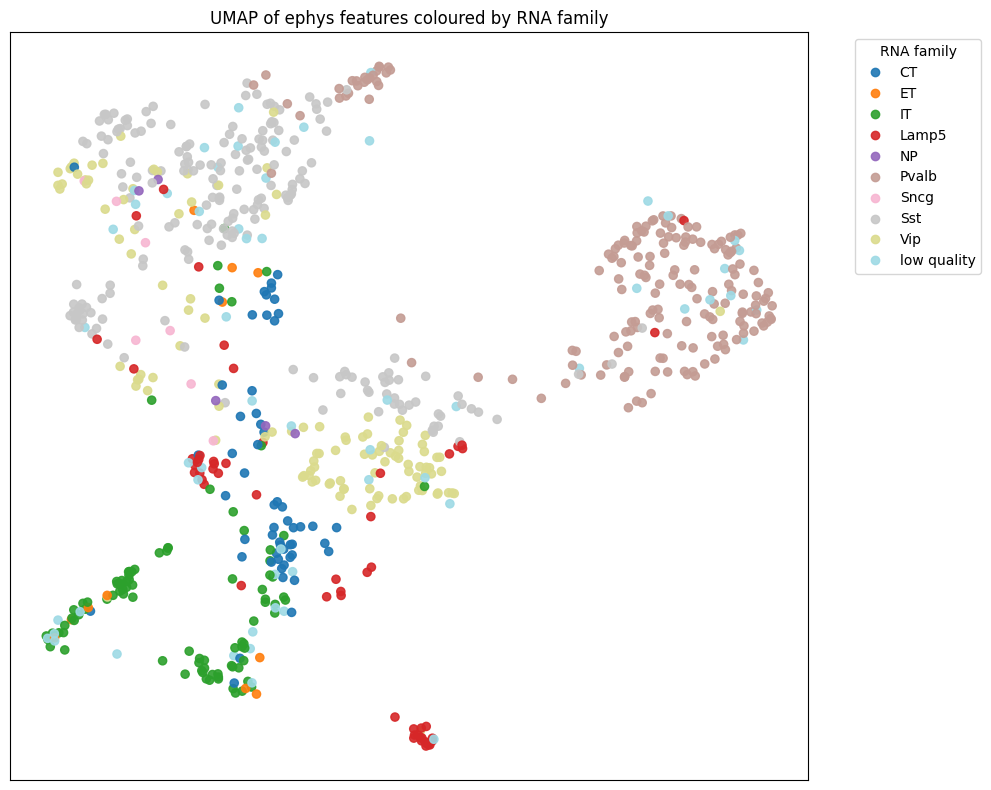

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler

# =========================
# check
# =========================
print("ephys_common shape:", ephys_common.shape)

# =========================
# numeric features only
# =========================
X_df = ephys_common.select_dtypes(include=[np.number]).copy()
print("Raw feature matrix:", X_df.shape)

mask = ~X_df.isna().any(axis=1)
print("Cells with any missing feature:", (~mask).sum())

X_df = X_df[mask]
short_ids = ephys_common.loc[mask, "short_id"].values
print("Clean feature matrix:", X_df.shape)

# =========================
# standardize
# =========================
X = X_df.values.astype(float)
X = StandardScaler().fit_transform(X)

# =========================
# UMAP
# =========================
emb = umap.UMAP(
    n_neighbors=25,
    min_dist=0.1,
    n_components=2,
    random_state=42
).fit_transform(X)

print("UMAP embedding shape:", emb.shape)

# =========================
# RNA metadata
# =========================
meta = pd.read_csv("/content/m1_patchseq_meta_data (1).csv", sep="\t")
meta = meta.rename(columns={"Cell": "short_id"})
meta["short_id"] = meta["short_id"].astype(str).str.strip()

rna_col = None
for c in meta.columns:
    if c.strip().lower().replace(" ", "") == "rnafamily":
        rna_col = c
        break
if rna_col is None:
    raise RuntimeError("RNA family column not found")

# =========================
# merge
# =========================
plot_df = pd.DataFrame({
    "short_id": short_ids,
    "UMAP1": emb[:, 0],
    "UMAP2": emb[:, 1]
})

plot_df = plot_df.merge(
    meta[["short_id", rna_col]],
    on="short_id",
    how="left"
).rename(columns={rna_col: "RNA_family"})

print("Cells without RNA family:", plot_df["RNA_family"].isna().sum())

# =========================
# plot
# =========================
plt.figure(figsize=(10, 8))

mask_lab = plot_df["RNA_family"].notna()
mask_un  = ~mask_lab

plt.scatter(
    plot_df.loc[mask_un, "UMAP1"],
    plot_df.loc[mask_un, "UMAP2"],
    s=18, alpha=0.3, color="lightgray"
)

cats = plot_df.loc[mask_lab, "RNA_family"].astype("category")
codes = cats.cat.codes

sc = plt.scatter(
    plot_df.loc[mask_lab, "UMAP1"],
    plot_df.loc[mask_lab, "UMAP2"],
    c=codes, cmap="tab20", s=35, alpha=0.9
)

plt.xticks([]); plt.yticks([])
plt.title("UMAP of ephys features coloured by RNA family")

handles, _ = sc.legend_elements()
plt.legend(handles, cats.cat.categories, bbox_to_anchor=(1.05, 1), title="RNA family")

plt.tight_layout()
plt.show()
